# Lab 1 - Used Cars in the USA
#### By: David Wei, Sophia Wu, Dhruba Dey, Queena Wang

### Business Understanding:
1-2 things we want to predict
Based on type of data we want to predict, categorical/discrete/boolean/etc.

Predict = Price
Categorize = 




In [ ]:
#!pip install missingno
#!pip install plotnine

In [24]:
#importing libraries and reading in file
import pandas as pd
import numpy as np
import warnings
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine.data import economics
from plotnine import ggplot, aes, geom_line
warnings.filterwarnings('ignore') #ignoring warnings

In [25]:
# NOTE: need to change file per user
df_raw = pd.read_csv(r'C:\Data\used_cars_data.csv')
#df_raw = pd.read_csv('https://raw.githubusercontent.com/chee154/ml-Py-used_cars/main/data/kaggle_used_cars_data.csv')

In [3]:
df_raw.head(5)

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,1FTEW1CP3LFC52880,43.6 in,NaN,--,67.1 in,Pickup Truck,NaN,Huntsville,20.0,NaN,...,A,Automatic,t87709,XL SuperCrew RWD,NaN,4X2,4X2,145 in,96.8 in,2020
1,3N1CP5CV6LL501109,33.2 in,NaN,NaN,NaN,SUV / Crossover,NaN,Opelousas,31.0,NaN,...,CVT,Continuously Variable Transmission,t90150,SV FWD,NaN,FWD,Front-Wheel Drive,103.1 in,69.3 in,2020
2,5LM5J7XC5LGL29065,40.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Fort Myers,17.0,NaN,...,A,Automatic,t85101,Reserve AWD,NaN,AWD,All-Wheel Drive,119 in,89.9 in,2020
3,VB57A151926,NaN,NaN,NaN,NaN,NaN,NaN,Boerne,NaN,NaN,...,A,Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957
4,1G1FE1R76L0144294,29.9 in,NaN,NaN,NaN,Coupe,NaN,Peoria,16.0,NaN,...,M,6-Speed Manual,t85926,1SS Coupe RWD,NaN,RWD,Rear-Wheel Drive,110.7 in,74.7 in,2020


In [42]:
print("Total # of Records: " + str(df_raw.shape[0]))
print("Total # of Columns: " + str(df_raw.shape[1]))

Total # of Records: 3000040
Total # of Columns: 66


### Data Meaning Type

#### Domain based Attribute Reduction
Before we do a deep dive into the types of our data, we will first look into reducing it from a  The total dataset has 66 attributes After a quick observation of the column headers, we can deduce that not all columns will be necessary for our analysis. Reasons for removing them below:

In [26]:
#subsetting columns by referencing the column indexes
df_cln_1 = df_raw.iloc[:, np.r_[0,5,7:11,13:17,18:21,22:30,32,35:38,42:50,51,55:57,61:63,64:66]]
print(df_cln_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000040 entries, 0 to 3000039
Data columns (total 40 columns):
 #   Column                Dtype  
---  ------                -----  
 0   vin                   object 
 1   body_type             object 
 2   city                  object 
 3   city_fuel_economy     float64
 4   combine_fuel_economy  float64
 5   daysonmarket          int64  
 6   engine_cylinders      object 
 7   engine_displacement   float64
 8   engine_type           object 
 9   exterior_color        object 
 10  frame_damaged         object 
 11  franchise_dealer      bool   
 12  franchise_make        object 
 13  fuel_tank_volume      object 
 14  fuel_type             object 
 15  has_accidents         object 
 16  height                object 
 17  highway_fuel_economy  float64
 18  horsepower            float64
 19  interior_color        object 
 20  isCab                 object 
 21  is_new                bool   
 22  length                object 
 23  listed_

### Data Quality

<AxesSubplot:>

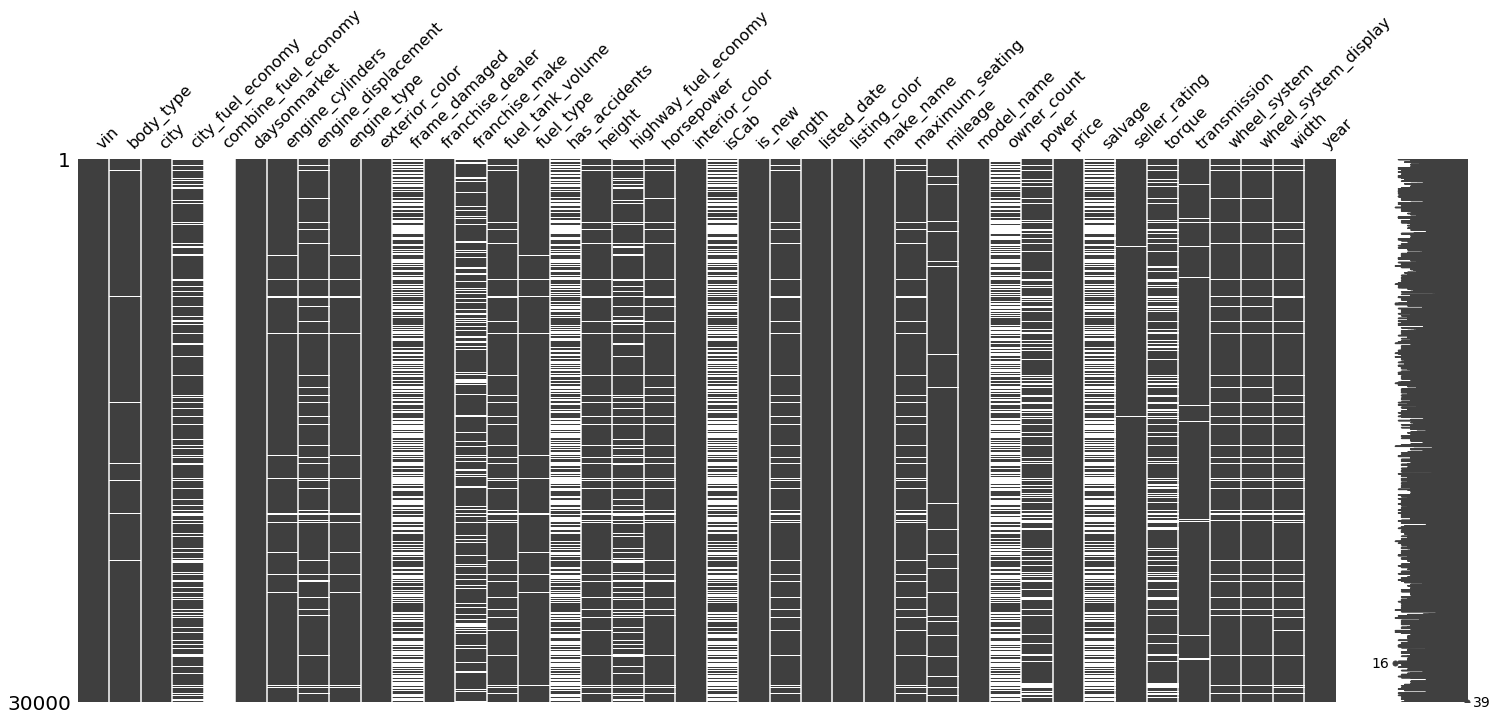

In [6]:
msno.matrix(df_cln_1)

After doing a quick profiling on some our identified columsn, we can see that both engine_cylinders and engine_type are the same. Additionally, we also found that the prefixes and suffixes attached to them are descriptive of it and thus not a continuous value. 

In [27]:
# removing city_fuel_economy since a quick vizualition of our dataset shows that ALL values are empty
df_cln_1 = df_cln_1.drop(columns='combine_fuel_economy')
print(df_cln_1.shape[1])

39


We also found that 'engine_cylinders','engine_type' contains the same data in two separate columns, so we first test if this condition is true and if it is, we will remove one.

In [28]:
#observing if 'engine_cylinders','engine_type' is the same data
if df_cln_1['engine_cylinders'].equals(df_cln_1['engine_type']) == True:
    df_cln_1 = df_cln_1.drop(columns='engine_cylinders')
    print(df_cln_1.shape[1])

38


We also found additional columns that were simply descriptions of another columns, for example. The 'wheel_system_display' attribute is simply a longer, more descriptive version of the 'wheel_system' attribute ("Front-Wheel Drive" vs "FWD"). For columns that follow this trend, we will remove the descriptive column from our dataset. 

In [29]:
print(df_cln_1[['wheel_system']])
print(df_cln_1[['wheel_system_display']])
df_cln_1 = df_cln_1.drop(columns='wheel_system_display')
print(df_cln_1.shape[1])

        wheel_system
0                FWD
1                AWD
2                AWD
3                AWD
4                AWD
...              ...
3000035          FWD
3000036          FWD
3000037          FWD
3000038          AWD
3000039          FWD

[3000040 rows x 1 columns]
        wheel_system_display
0          Front-Wheel Drive
1            All-Wheel Drive
2            All-Wheel Drive
3            All-Wheel Drive
4            All-Wheel Drive
...                      ...
3000035    Front-Wheel Drive
3000036    Front-Wheel Drive
3000037    Front-Wheel Drive
3000038      All-Wheel Drive
3000039    Front-Wheel Drive

[3000040 rows x 1 columns]
37


We also discussed that 'interior_color' attribute has 45,726 distinct color values and so due to the sheer volume and complexity (since the color attribute is also not consistently 1 color). We also decided to remove it from our dataset since it is unrealistic for the type of modeling we are doing.

In [30]:
print(df_cln_1['interior_color'].nunique())

df_cln_1 = df_cln_1.drop(columns='interior_color')
print(df_cln_1.shape[1])

45726
36


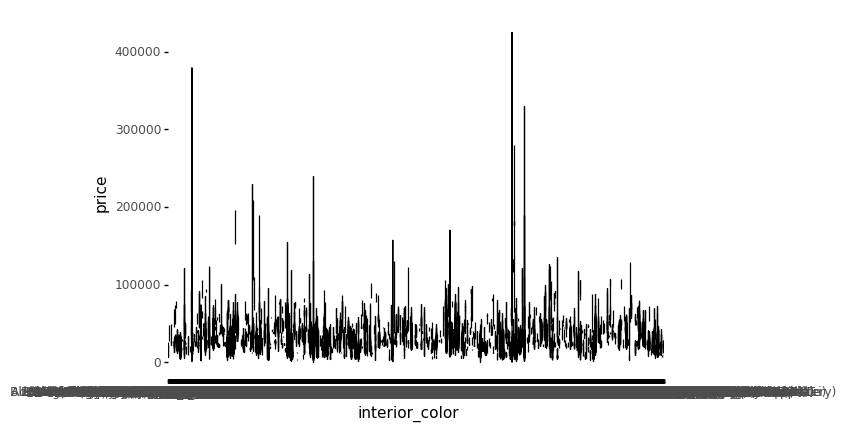

<ggplot: (160544166783)>

In [19]:
#note this plot takes forever to run
(ggplot(df_cln_1)+aes(x="interior_color", y="price")+geom_line())

Another attribute we found that could be removed as the "listed_date" attribute. Since there was no other 'datetype' attributes available in our dataset, we didn't really see a point with keeping it as there was no other data reference to use it with. Additionally, the attribute 'daysonmarket' already pre-aggregated the number of days it took to sell a vehicle, which the listed date would've been used for otherwise. Because of this, we will also remove it from our dataframe.

In [31]:
df_cln_1 = df_cln_1.drop(columns='daysonmarket')
print(df_cln_1.shape[1])

35


### Data Cleaning - Missing Data & Nulls
Now that our datatypes have been adjusted. We will work on cleaning up any empty data in our dataset. A quick visualization of our data shows that almost every column has empty values. We will focus on analyzing those that have a large amount of empty data (ex. Frame_Damaged, has_accidents, isCab, etc.)

In [32]:
# remove the missing values
df_cln_2 = df_cln_1.dropna()
print(len(df_cln_2))

697997


In [ ]:
# checking the row counts of columns to see the missing rows
df_cln_2.count()

<AxesSubplot:>

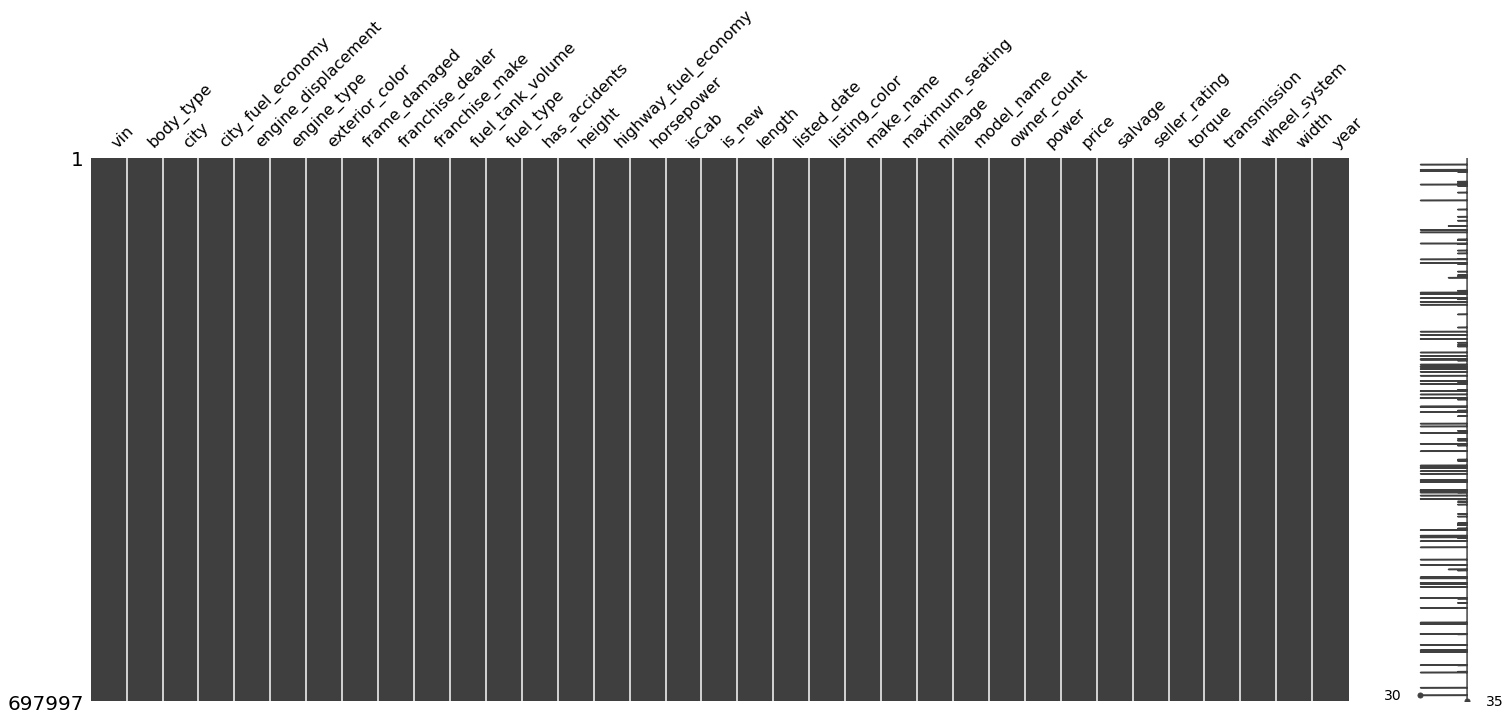

In [38]:
#visualizatin of our data after removing all rows with missing data
msno.matrix(df_cln_2)

In [ ]:
sns.catplot(x="city_fuel_economy", kind="count", data=df_cln_2)

We decided that since our original dataset was large (10gb with 3million records), that instead of imputing data based on the mean or other statistical types, that deleting all records with empty values still returned 700,000 total records that not only provides plenty of data leftover, but also raw data that isn't imputed. 

### Data Cleaning - Datatypes
Obviously at this point we need to convert a few of our data columns to the appropriate data type by removing parts of the value string that we do not need such as "gal" in the ful_tank_volume

In [ ]:
#finding all unique values per column to see what values we need to clean
columns_that_need_cleaning = ['engine_type','exterior_color','frame_damaged','franchise_dealer','franchise_make','fuel_tank_volume','fuel_type','has_accidents','height','interior_color','isCab','is_new','length','listed_date','listing_color','make_name','maximum_seating','model_name','power','salvage','torque','transmission','wheel_system','wheel_system_display','width']
for col in columns_that_need_cleaning:
        print(df_cln_2[col].unique())

In [ ]:
#finding all unique values per column to see what values we need to clean
columns_that_need_cleaning_2 = ['fuel_tank_volume','height','length','maximum_seating','width',]
for col in columns_that_need_cleaning_2:
        print(df_cln_2[col].unique())

Regarding fuel_tank_volume and maximum_seating, we can see that there appears to be a pattern in the suffixes, "gal" and "seats" accordingly. We will now remove them and then convert all values to numeric.

In [33]:
#removing unecesary string values in columns
#then cleaning up any values that contain '--' and replacing it with NaN
#Lastly, converting the value first to a string type and then to a float type

df_cln_2['fuel_tank_volume']=df_cln_2['fuel_tank_volume'].astype(str).str.replace(' gal', '').replace('--',np.NaN).astype(float)
df_cln_2['height']=df_cln_2['height'].astype(str).str.replace(' in', '').replace('--',np.NaN).astype(float)
df_cln_2['length']=df_cln_2['height'].astype(str).str.replace(' in', '').replace('--',np.NaN).astype(float)
df_cln_2['maximum_seating']=df_cln_2['maximum_seating'].astype(str).str.replace(' seats', '').replace('--',np.NaN).astype(float)
df_cln_2['width']=df_cln_2['width'].astype(str).str.replace(' in', '').replace('--',np.NaN).astype(float)

In [34]:
#doing a quick profile on the subsetted columns
print(df_cln_2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697997 entries, 38 to 3000039
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vin                   697997 non-null  object 
 1   body_type             697997 non-null  object 
 2   city                  697997 non-null  object 
 3   city_fuel_economy     697997 non-null  float64
 4   engine_displacement   697997 non-null  float64
 5   engine_type           697997 non-null  object 
 6   exterior_color        697997 non-null  object 
 7   frame_damaged         697997 non-null  object 
 8   franchise_dealer      697997 non-null  bool   
 9   franchise_make        697997 non-null  object 
 10  fuel_tank_volume      697827 non-null  float64
 11  fuel_type             697997 non-null  object 
 12  has_accidents         697997 non-null  object 
 13  height                697890 non-null  float64
 14  highway_fuel_economy  697997 non-null  float64
 15

We can now see that all of our column values have been adjusted to the correct datatypes. We will next proceed with cleaning up the remainder of our data. 

In [41]:
df_final = df_cln_2.iloc[:, np.r_[1,3:5,7,12,14:16,17,22:24,25,27,29,34]]
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697997 entries, 38 to 3000039
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   body_type             697997 non-null  object 
 1   city_fuel_economy     697997 non-null  float64
 2   engine_displacement   697997 non-null  float64
 3   frame_damaged         697997 non-null  object 
 4   has_accidents         697997 non-null  object 
 5   highway_fuel_economy  697997 non-null  float64
 6   horsepower            697997 non-null  float64
 7   is_new                697997 non-null  bool   
 8   maximum_seating       697892 non-null  float64
 9   mileage               697997 non-null  float64
 10  owner_count           697997 non-null  float64
 11  price                 697997 non-null  float64
 12  seller_rating         697997 non-null  float64
 13  year                  697997 non-null  int64  
dtypes: bool(1), float64(9), int64(1), object(3)
memory

### Simple Statistics

### Visualize Attributes

### Explore Joint Attributes

### Explore Attributes and Class

### New Features

### Exceptional Work